# Embeddings  Clustering

Embeddings model: BERT

Category: types of news categories

#### Setup

In [77]:
#!pip install wordcloud Levenshtein

In [34]:
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd
from sklearn.metrics.pairwise import cosine_distances
from wordcloud import WordCloud
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sea
import warnings
import Levenshtein as lev
from src.utils import testing_best_kmeans_clustering
from sklearn.metrics import silhouette_score, silhouette_samples

warnings.filterwarnings("ignore")
pd.options.display.max_rows = 999
pd.set_option('max_colwidth', 1000)
SEED=42
notebook_start_time = time.time()

### Data Acces

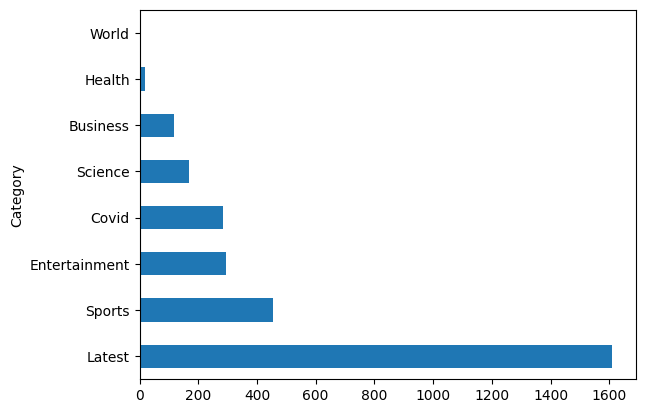

In [53]:
# processed data from Embeddings/hugging_face_bert.ipynb
dataframe = pd.read_parquet('../Datasets/pre_processed_dataframes/embeddings_df.parquet')
dataframe = dataframe[dataframe['language_name'] == 'English'].copy()
ax = dataframe['Category'].value_counts().plot(kind='barh')

### Finding best values for Perplexity and Cluster

In [54]:
unique_categories = dataframe['Category'].unique()
category_colors = []
if len(unique_categories) > 1:
    colors = sea.color_palette('hsv', len(unique_categories))
    color_dict = dict(zip(unique_categories, colors))
    category_colors = dataframe['Category'].map(color_dict)

TSNE perplexity =  6
For n_clusters = 3 The average silhouette_score is : 0.37590685
For n_clusters = 4 The average silhouette_score is : 0.36273184
For n_clusters = 5 The average silhouette_score is : 0.34651643
For n_clusters = 6 The average silhouette_score is : 0.35029173
For n_clusters = 7 The average silhouette_score is : 0.35812154
For n_clusters = 8 The average silhouette_score is : 0.3520531
For n_clusters = 9 The average silhouette_score is : 0.34434363


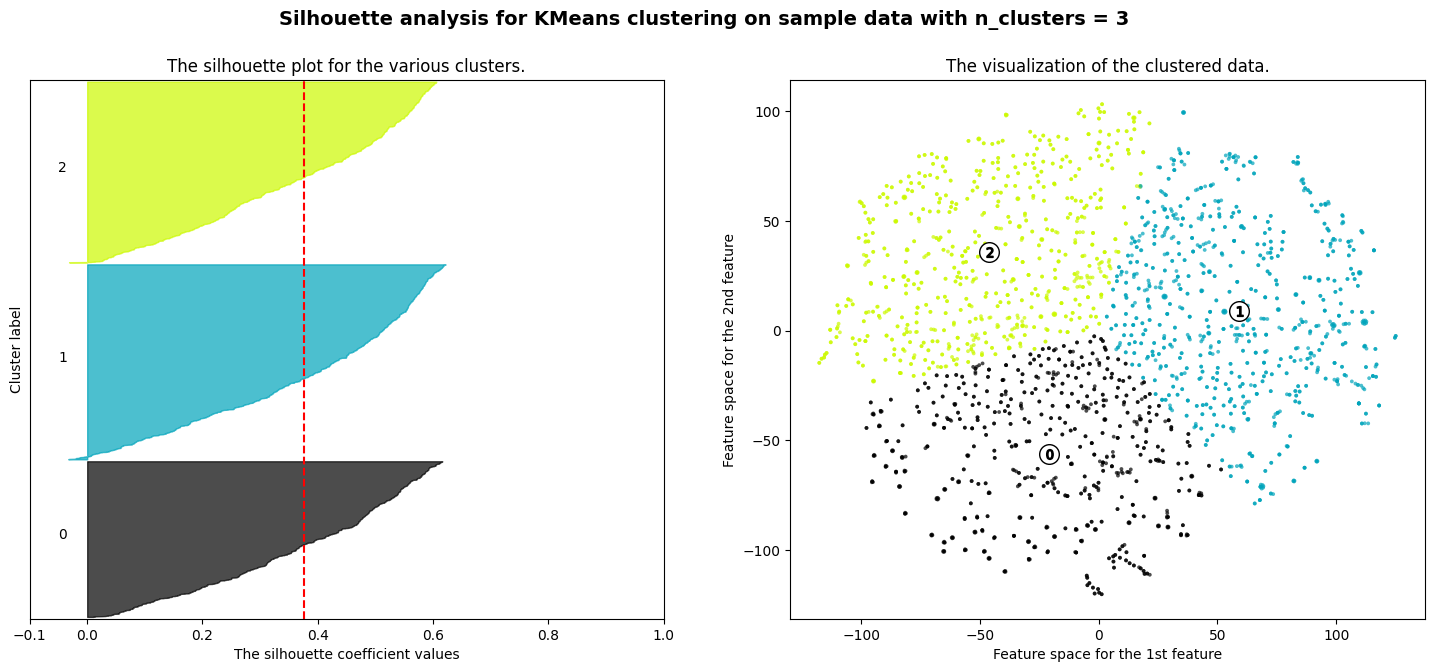

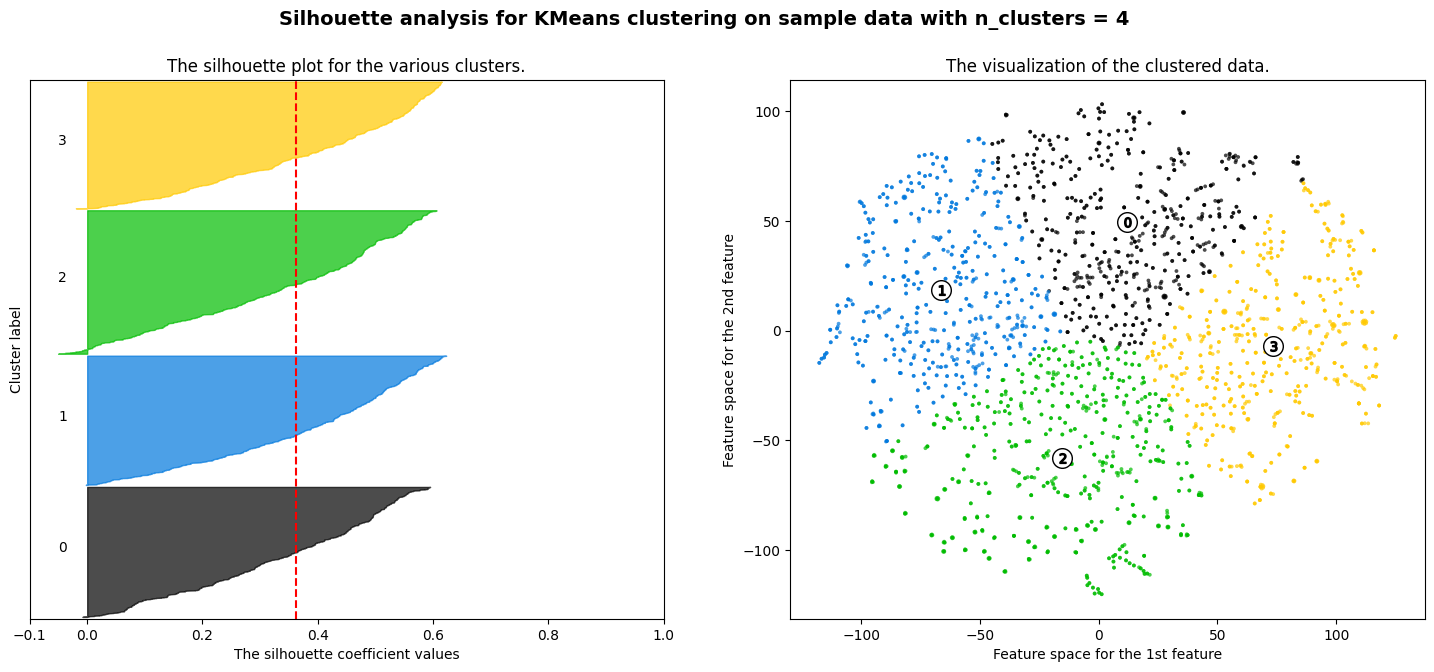

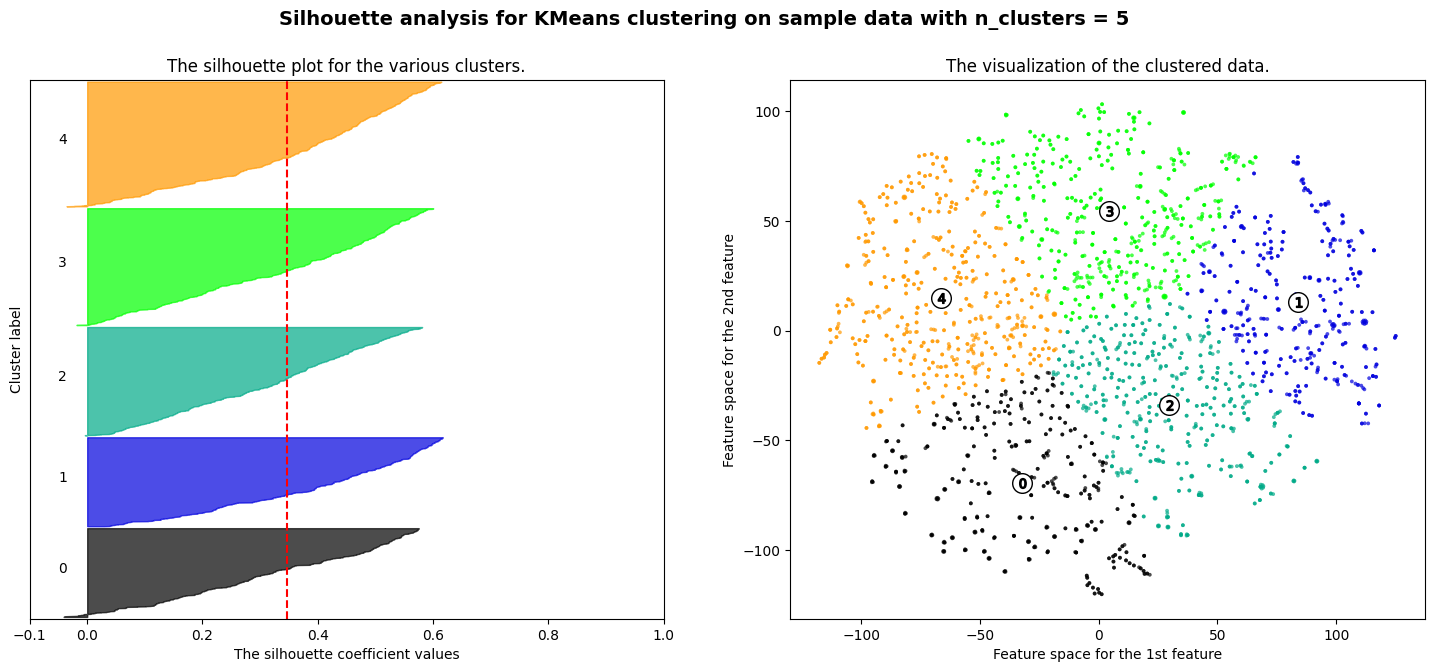

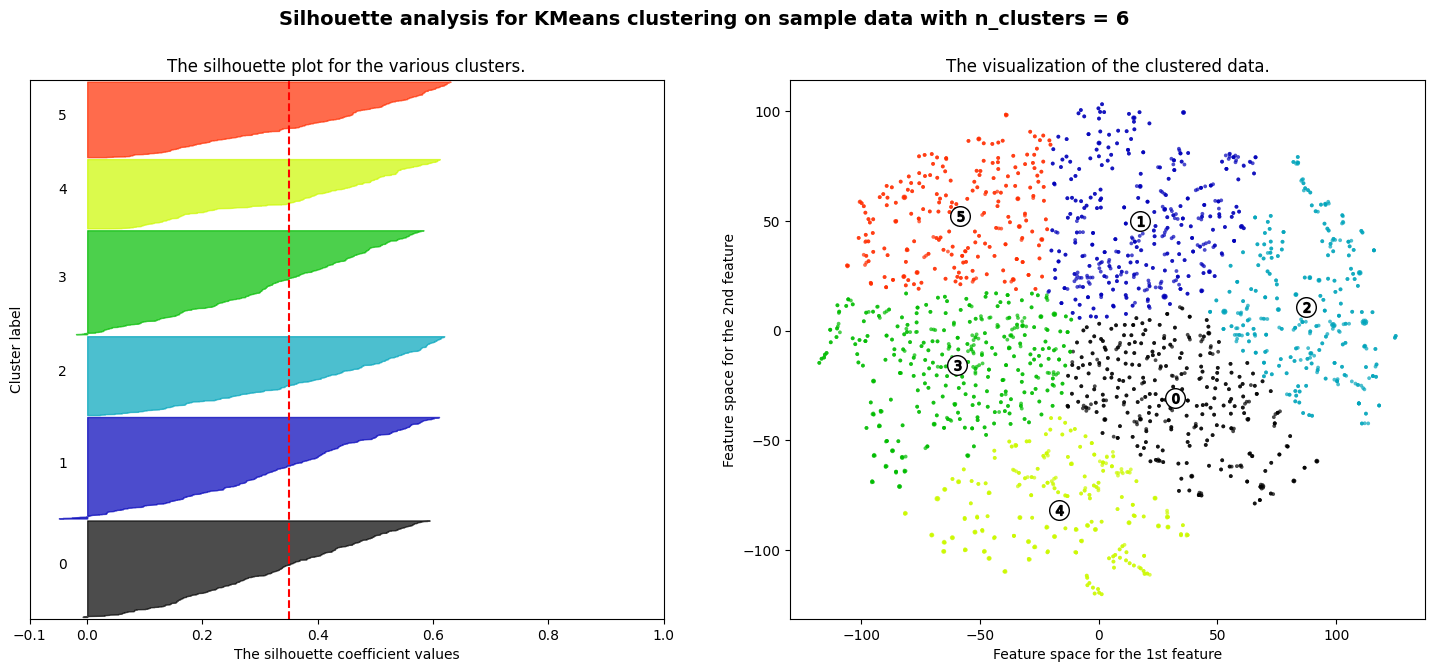

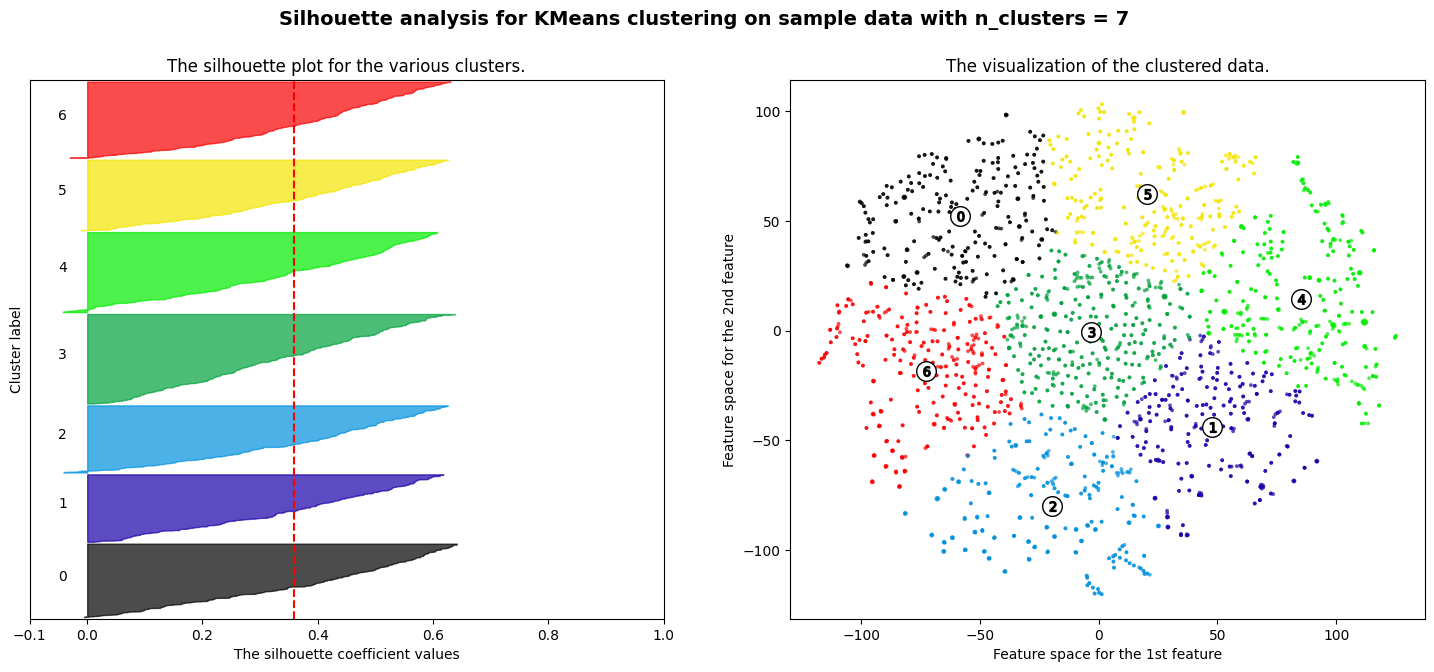

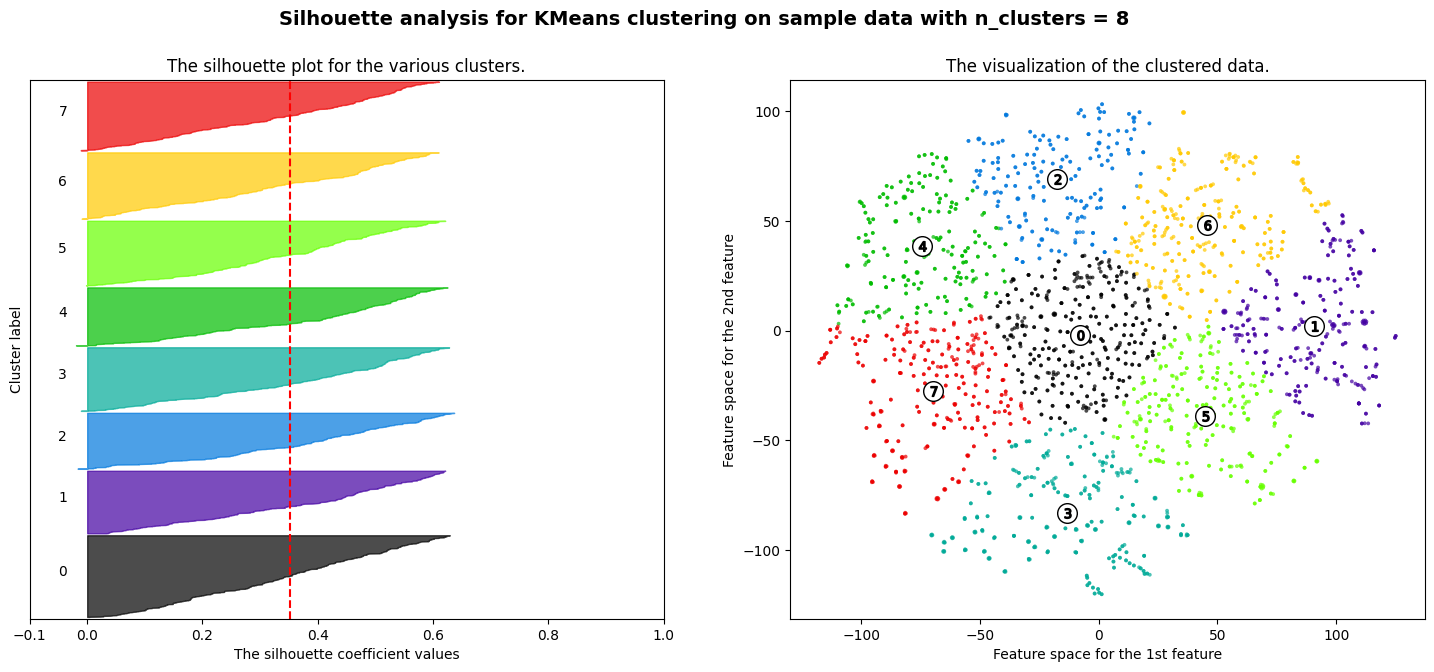

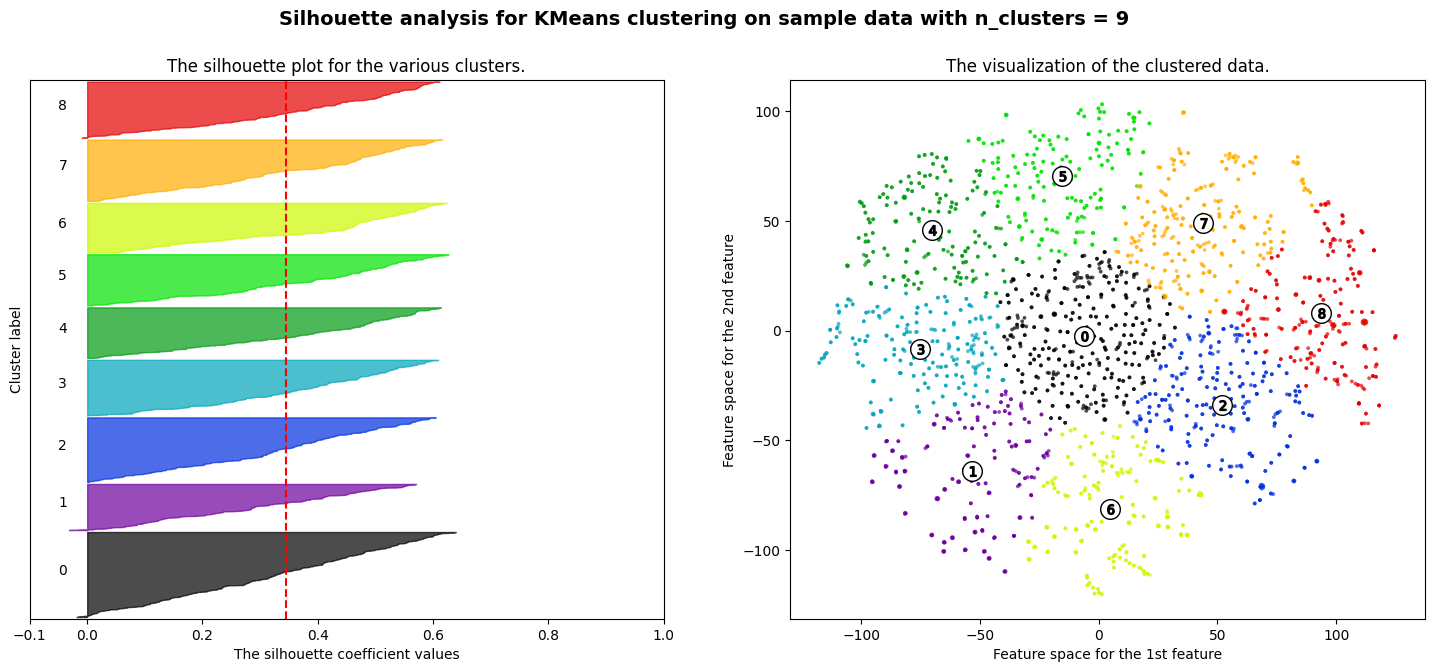

TSNE/KMeans execution time = 0.07016666666666667 (minutes)
__________________________________________________________________________

TSNE perplexity =  8
For n_clusters = 3 The average silhouette_score is : 0.38248682
For n_clusters = 4 The average silhouette_score is : 0.37147245
For n_clusters = 5 The average silhouette_score is : 0.36330664
For n_clusters = 6 The average silhouette_score is : 0.36527154
For n_clusters = 7 The average silhouette_score is : 0.37177226
For n_clusters = 8 The average silhouette_score is : 0.3700468
For n_clusters = 9 The average silhouette_score is : 0.36621746


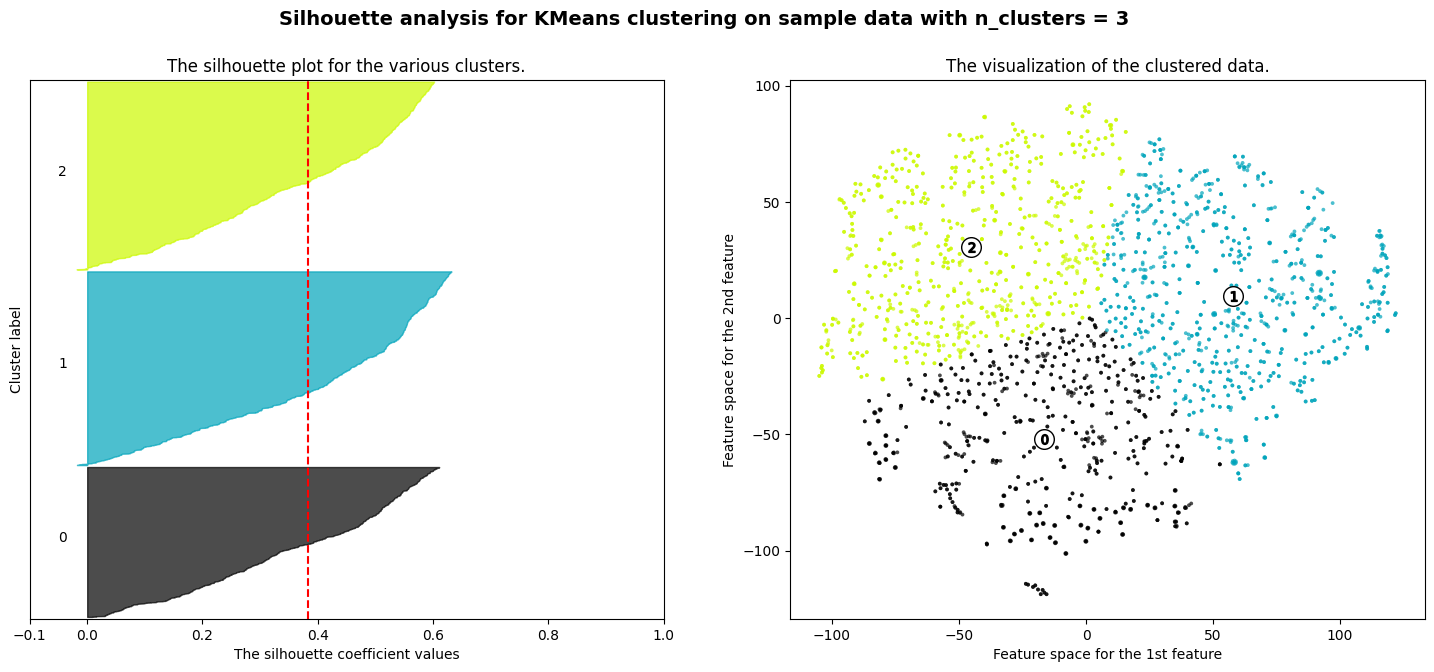

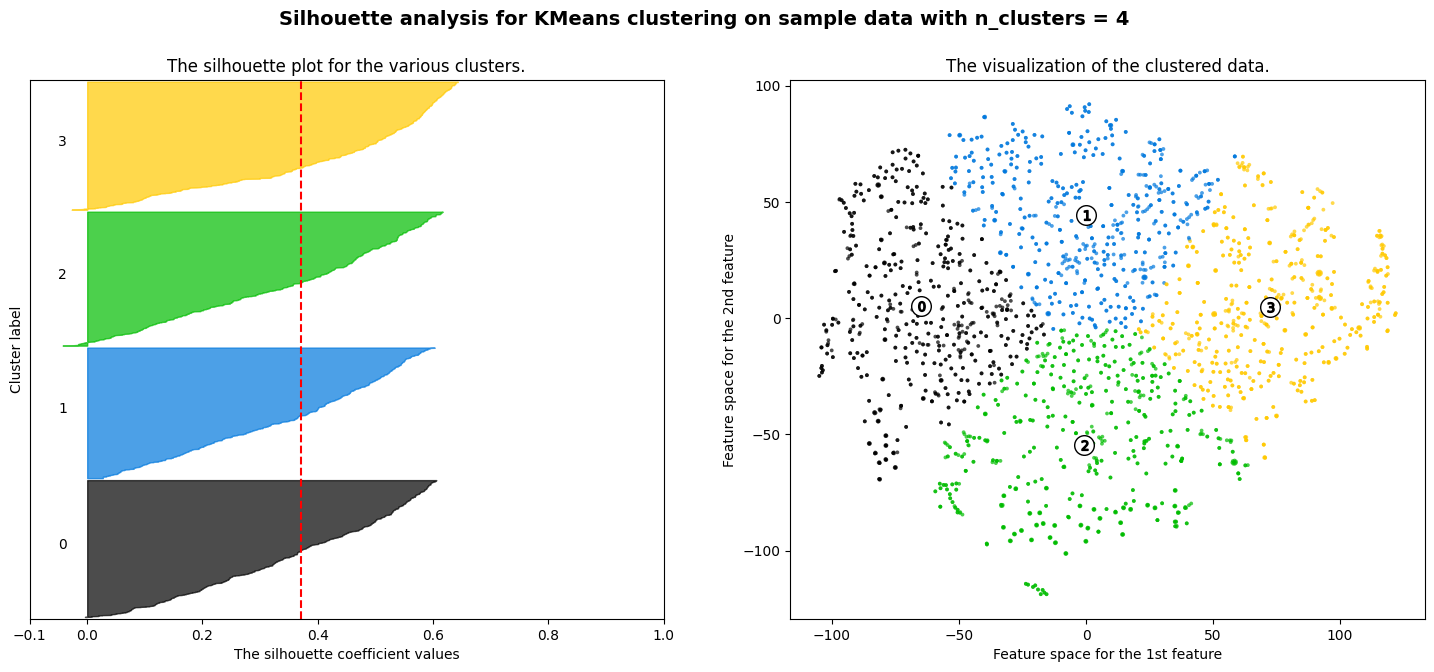

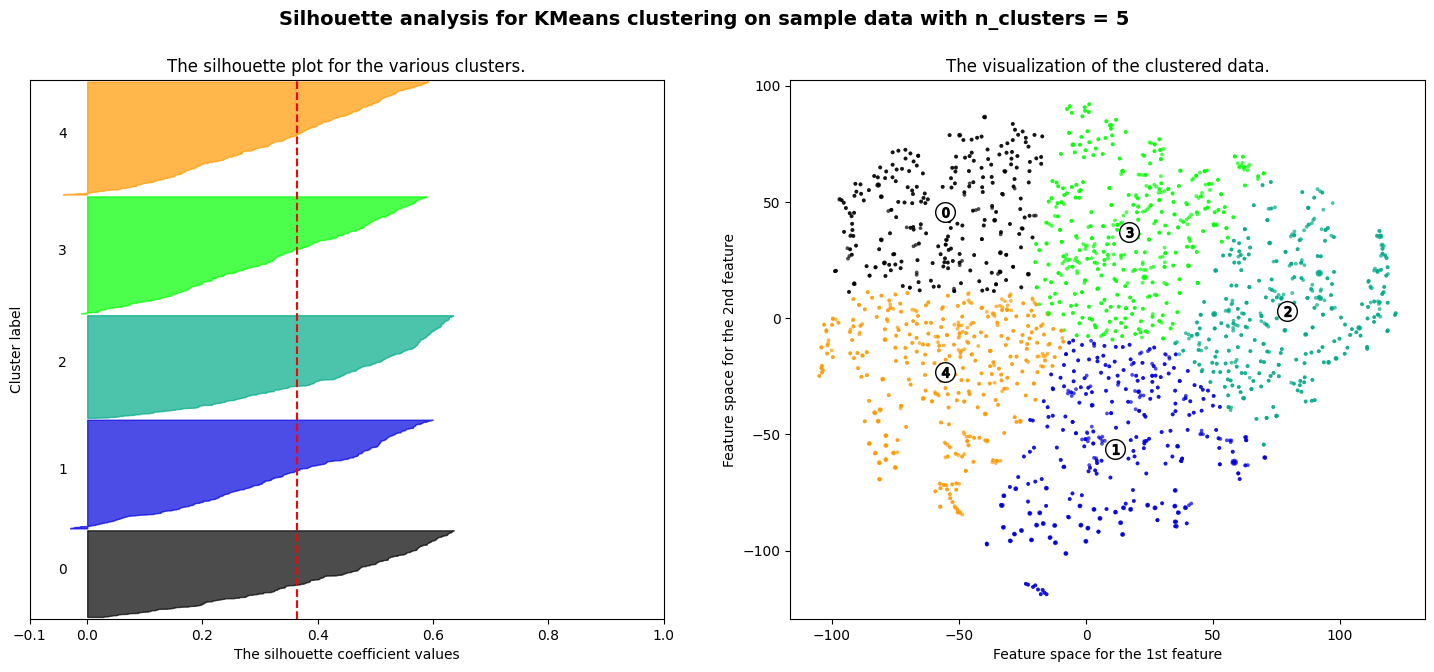

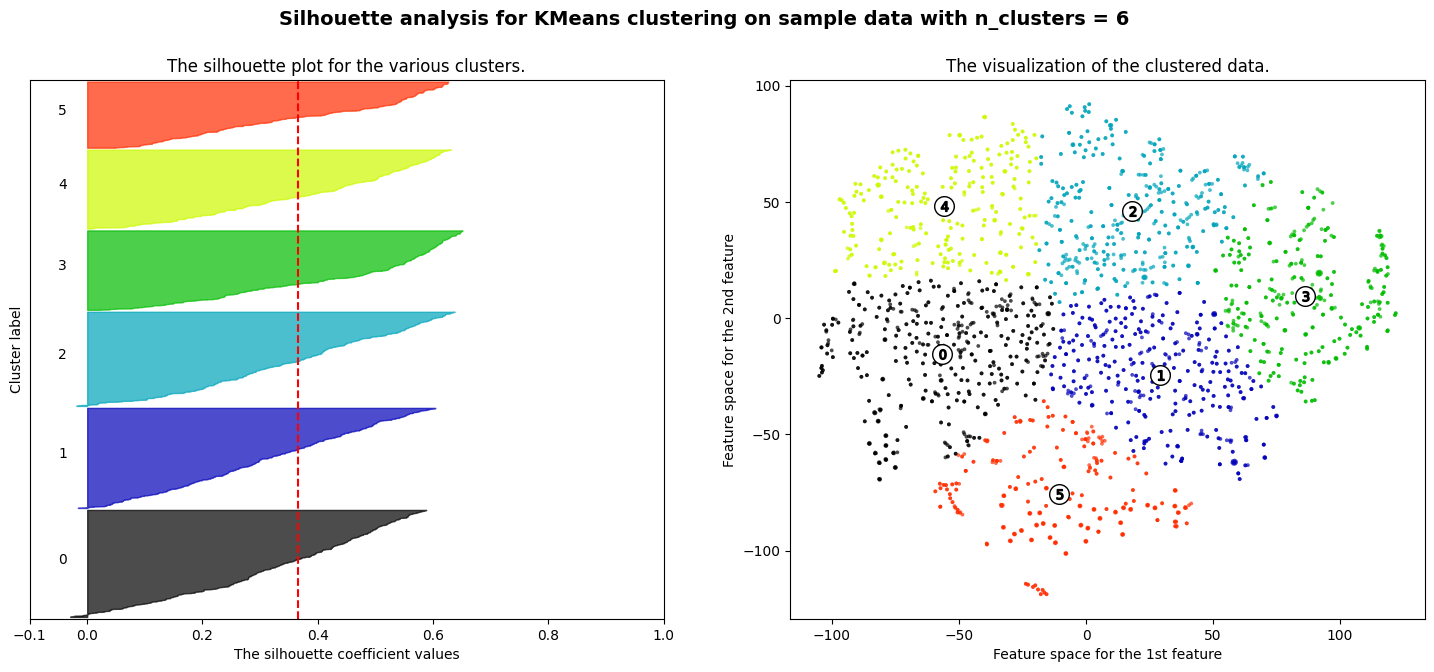

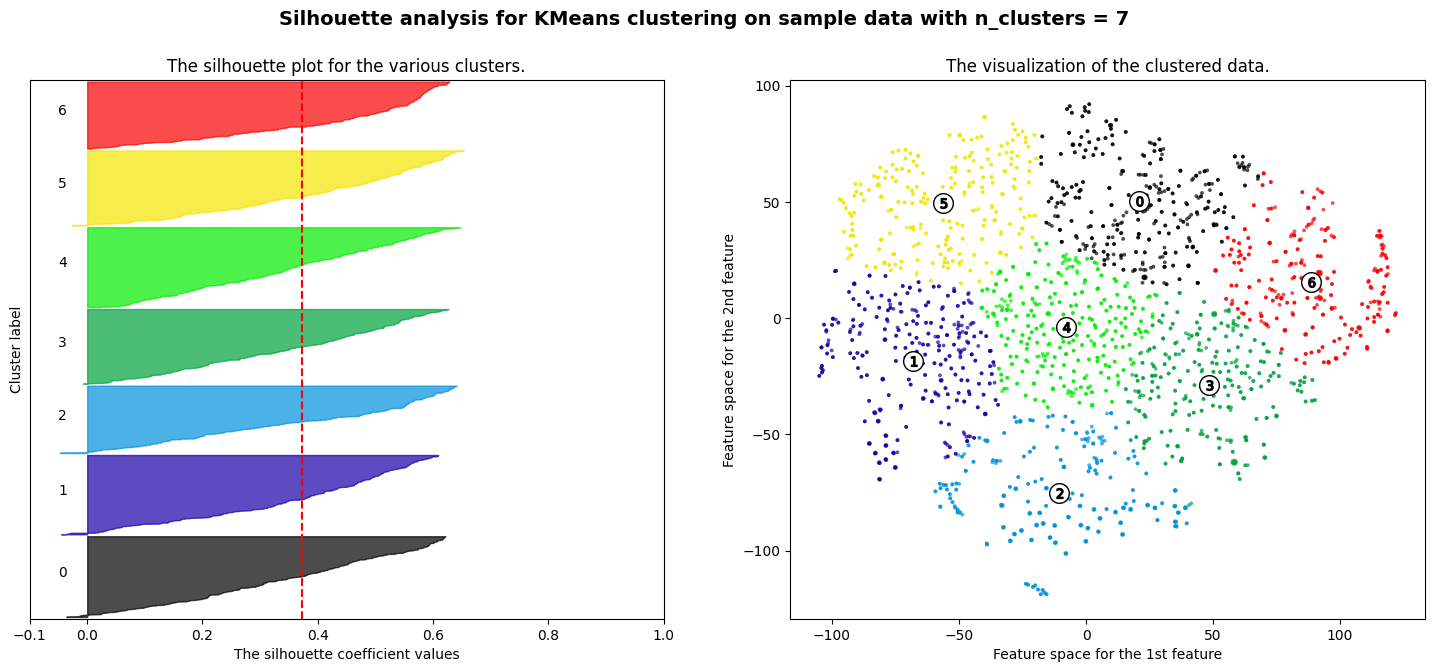

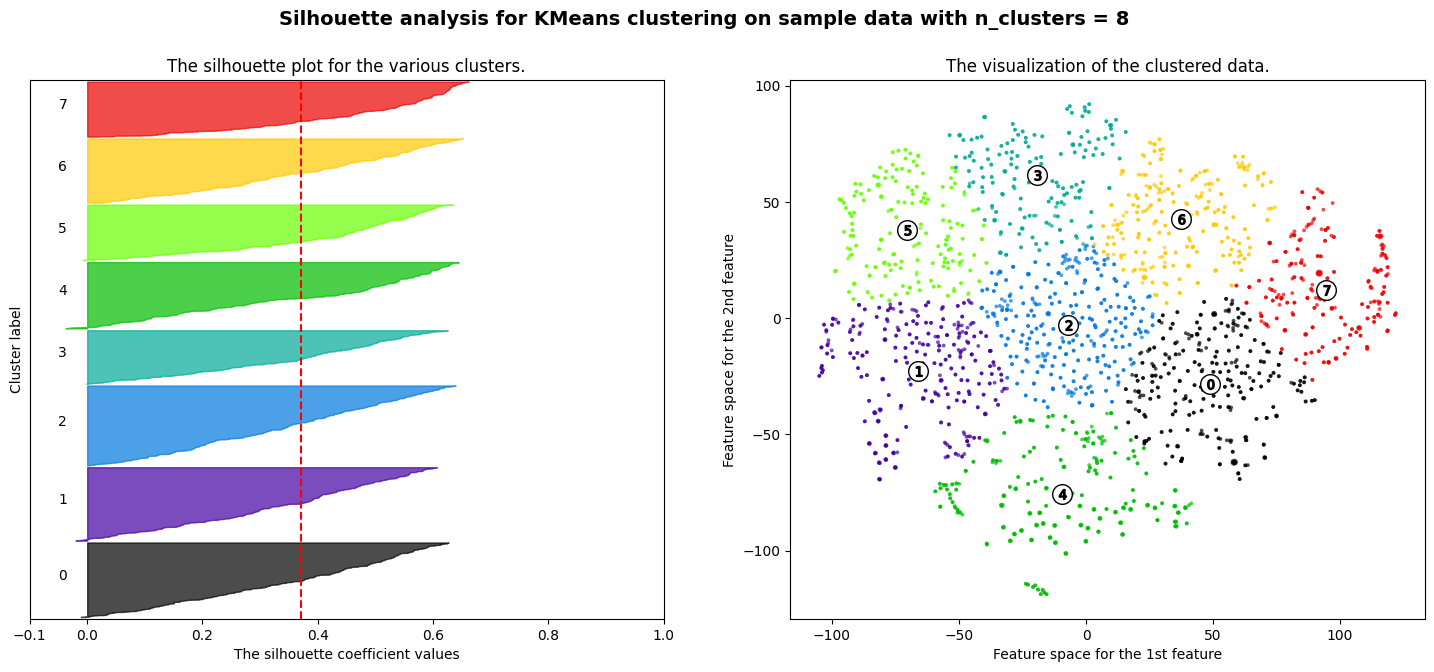

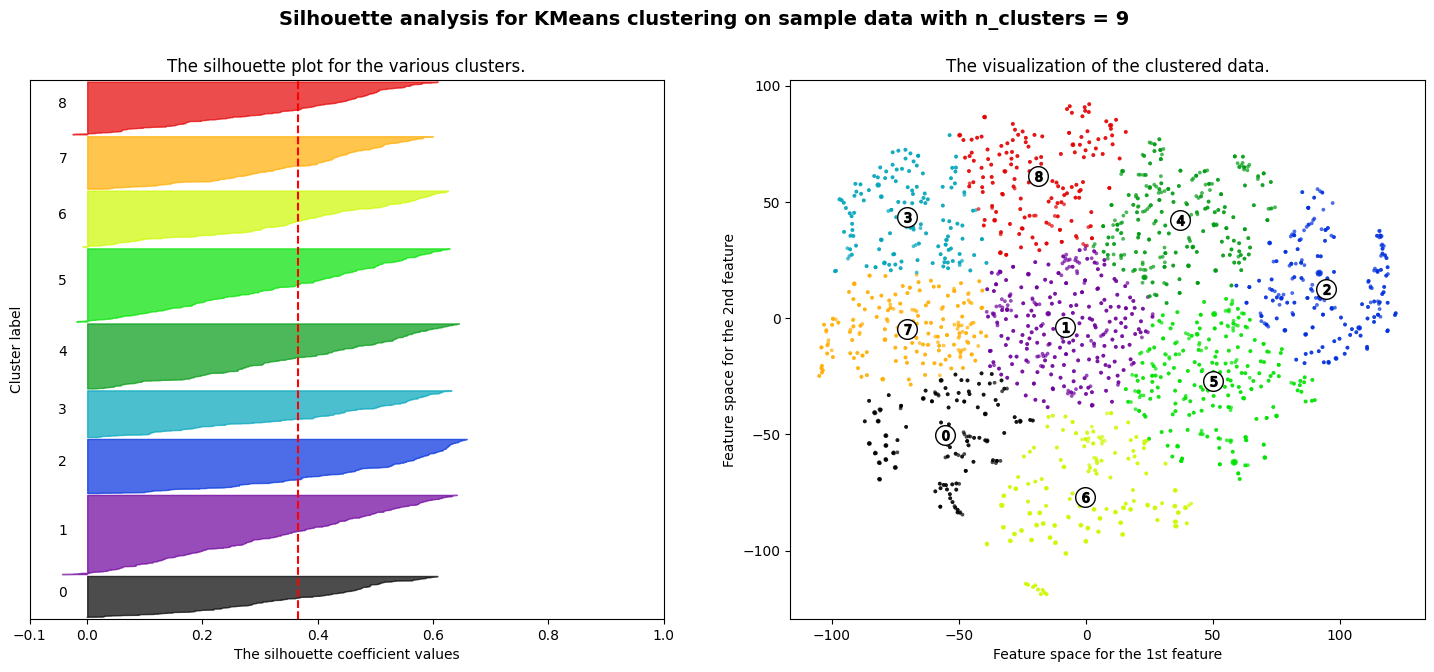

TSNE/KMeans execution time = 0.07133333333333333 (minutes)
__________________________________________________________________________

TSNE perplexity =  10
For n_clusters = 3 The average silhouette_score is : 0.39594755
For n_clusters = 4 The average silhouette_score is : 0.3822538
For n_clusters = 5 The average silhouette_score is : 0.36948526
For n_clusters = 6 The average silhouette_score is : 0.37134716
For n_clusters = 7 The average silhouette_score is : 0.37780705
For n_clusters = 8 The average silhouette_score is : 0.3799528
For n_clusters = 9 The average silhouette_score is : 0.37735507


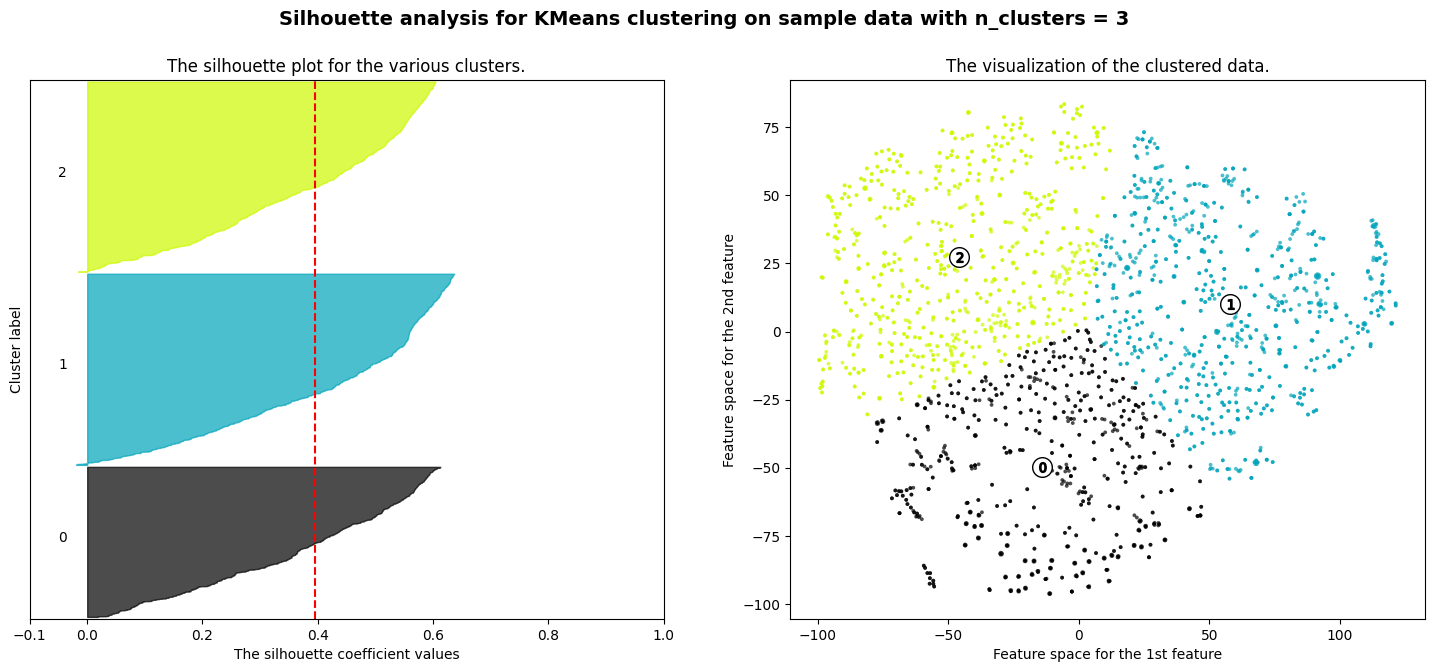

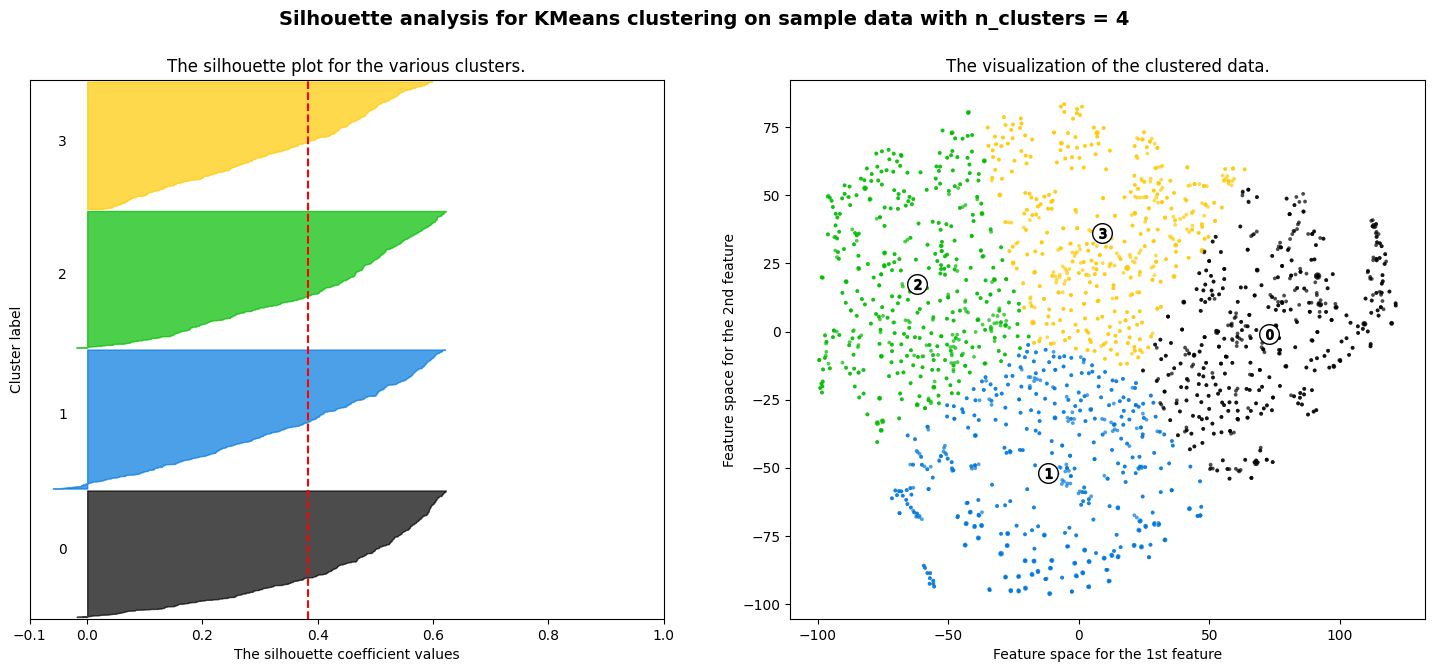

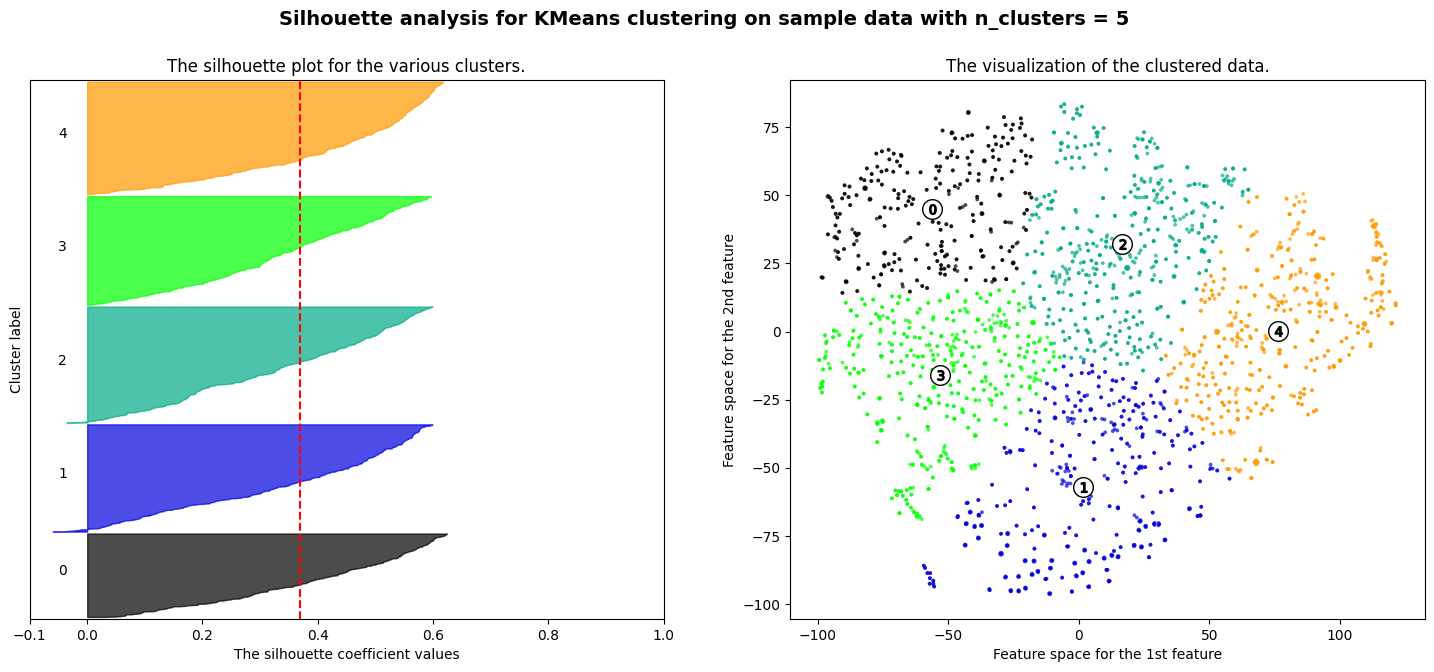

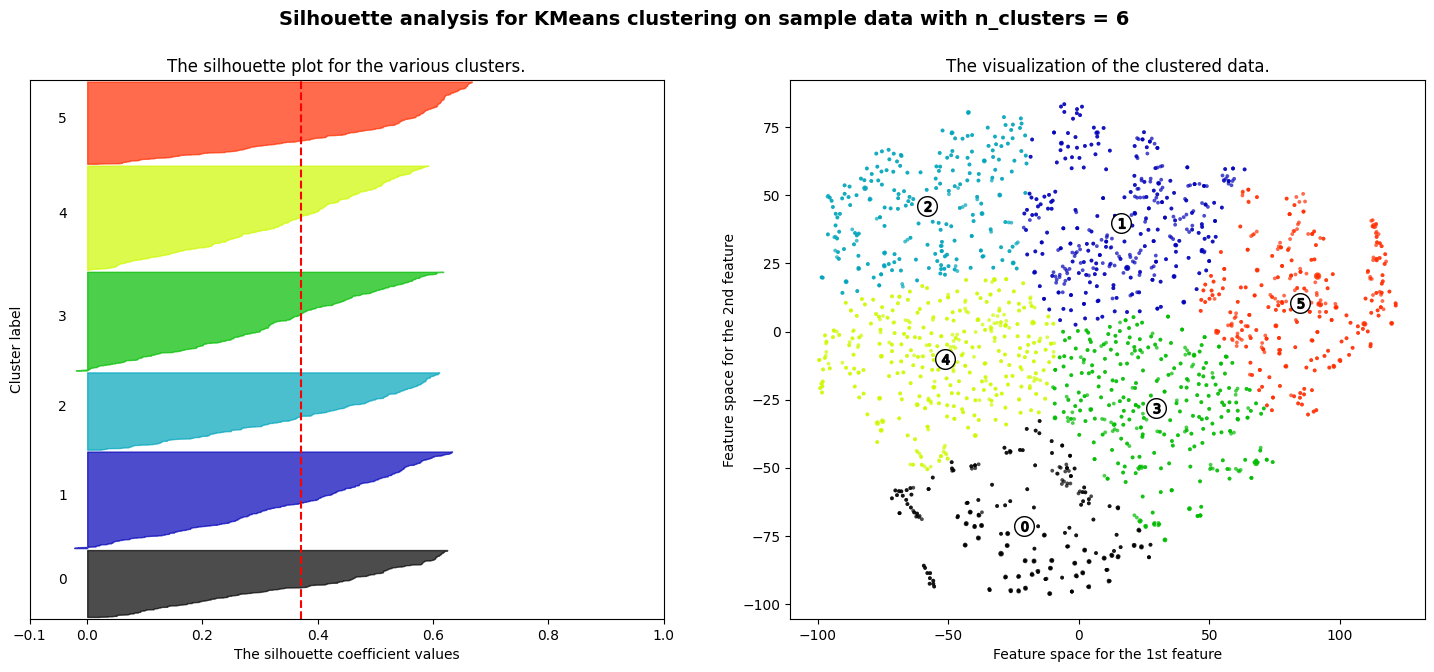

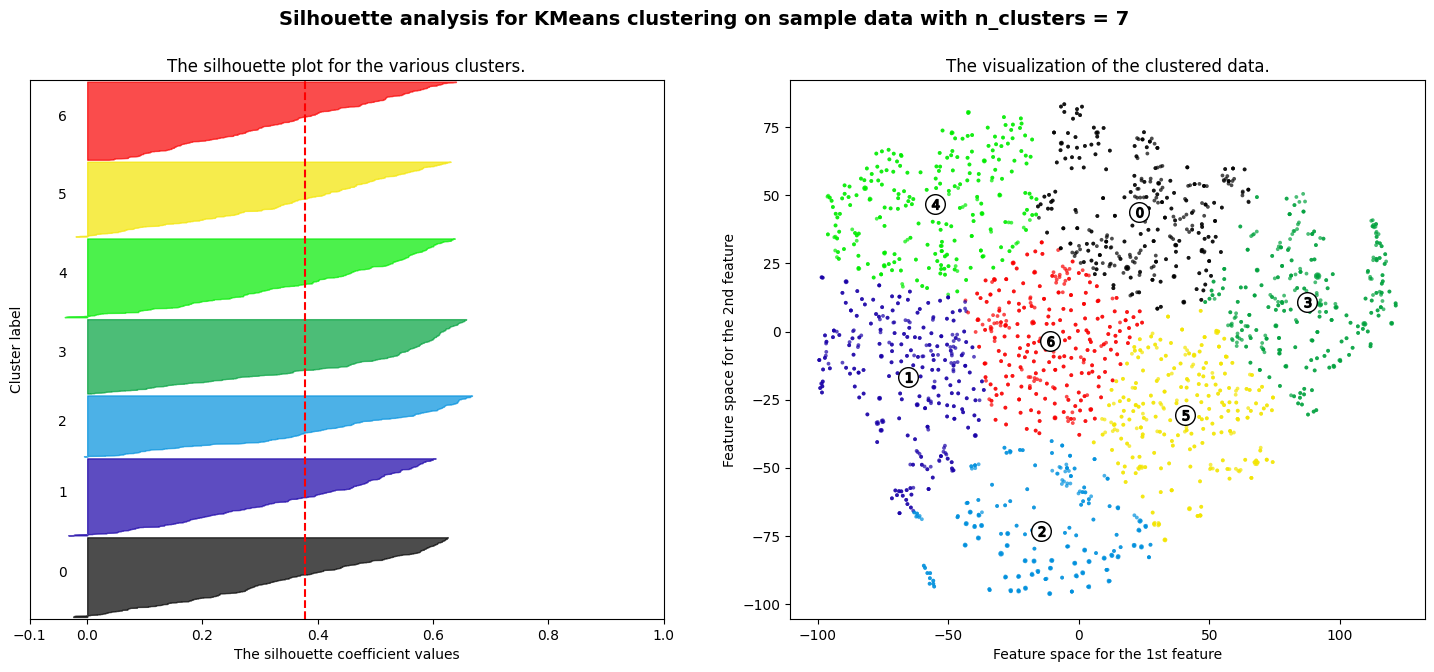

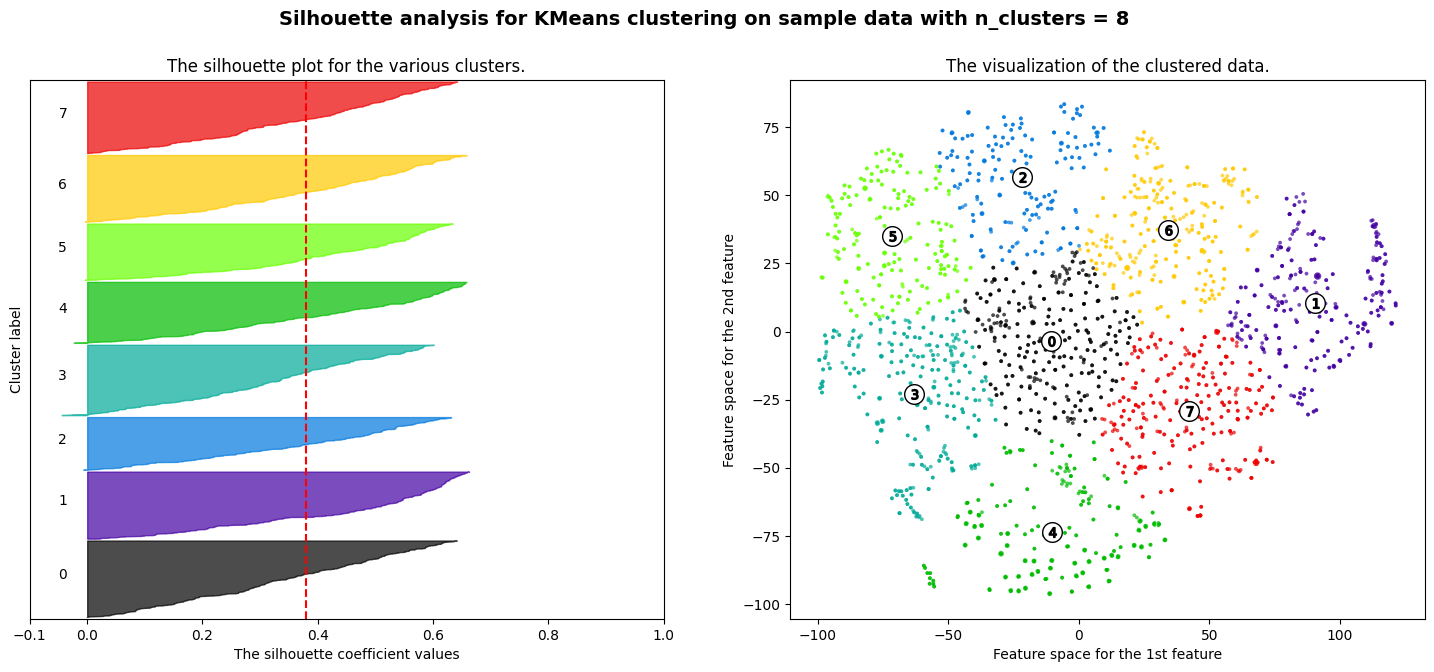

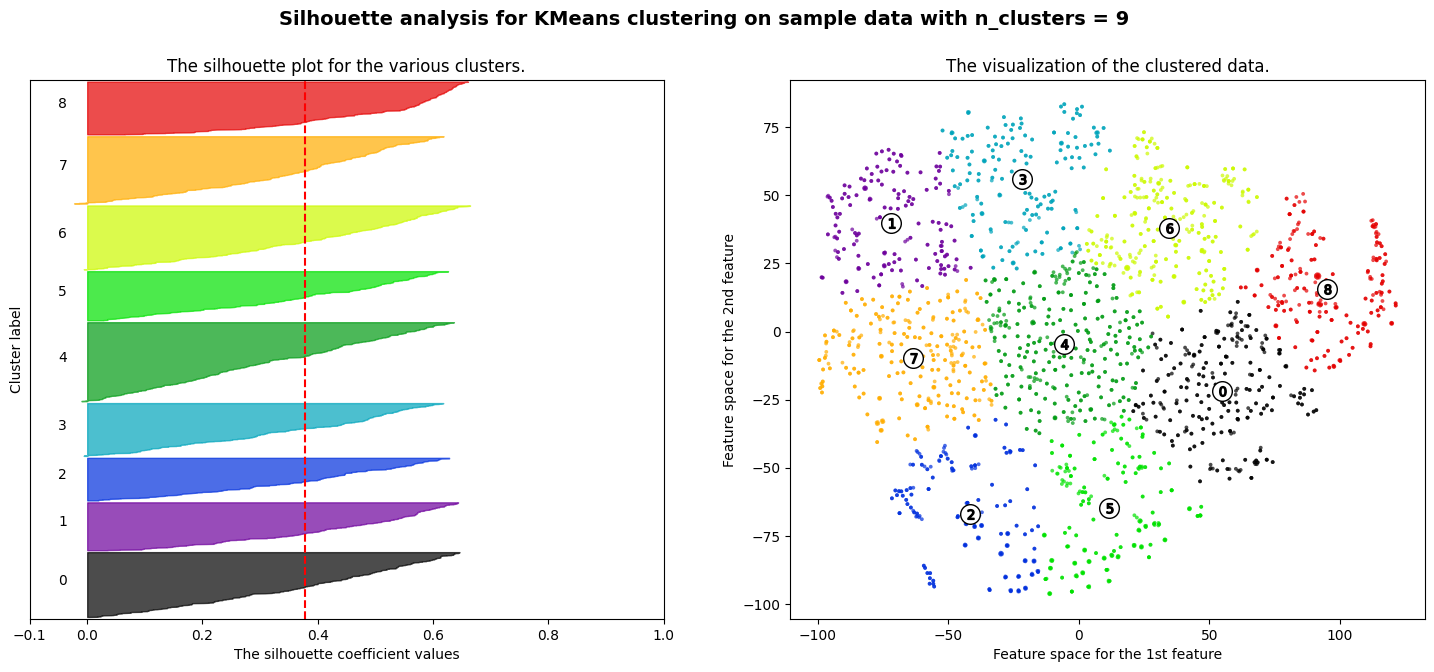

TSNE/KMeans execution time = 0.0755 (minutes)
__________________________________________________________________________



In [105]:
X = np.vstack(dataframe['embeddings_description'].values)
range_n_cluster = 10
perplexity_silhouette = {}
max_best_cluster = 0

for perplexity in np.arange(6, 12, step=2):
    print('TSNE perplexity = ', perplexity)
    start_time = time.time()
    tsne = TSNE(n_components=2, 
                random_state=42, 
                metric='cosine',            
                verbose=False,                                
                perplexity=perplexity)

    X_tsne = tsne.fit_transform(X)

    end_time = time.time()    
    best_silhouette_scores = testing_best_kmeans_clustering(range_n_cluster, X_tsne)
         
    best_cluster = max(best_silhouette_scores, key=best_silhouette_scores.get)

    if best_cluster > max_best_cluster:        
        perplexity_silhouette['perplexity']= perplexity
        perplexity_silhouette['scores'] = best_silhouette_scores
        perplexity_silhouette['best_cluster'] = best_cluster

    tsne_elapsed_time = np.round(end_time - start_time, 2)/60
    print(f'TSNE/KMeans execution time = {tsne_elapsed_time} (minutes)')
    print('__________________________________________________________________________\n')

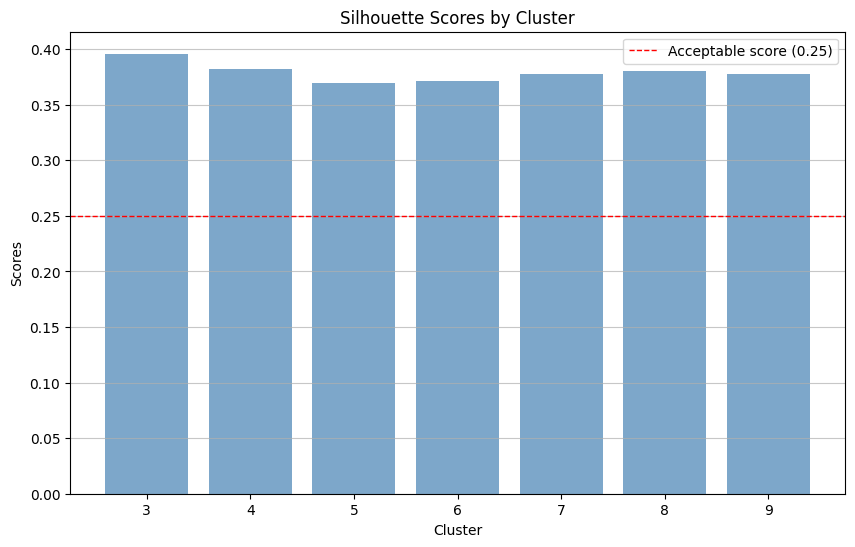

In [106]:
keys = list(perplexity_silhouette['scores'].keys())
values = list(perplexity_silhouette['scores'].values())
plt.figure(figsize=(10, 6))
plt.bar(keys, values, color='steelblue', alpha=0.7)
plt.axhline(y=0.25, color='red', linestyle='--', linewidth=1, label='Acceptable score (0.25)')
plt.title('Silhouette Scores by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Scores')
plt.xticks(keys)
plt.legend()
plt.grid(axis='y', alpha=0.7)
plt.show()

In [107]:
best_cluster = perplexity_silhouette['best_cluster']
best_perplexity = perplexity_silhouette['perplexity']

best_cluster, best_perplexity

(3, 10)

### KMeans and TSNE

In [108]:
tsne = TSNE(n_components=2, 
            random_state=42, 
            metric='cosine',            
            verbose=False,                                
            perplexity=best_perplexity)

X_tsne = tsne.fit_transform(X)

clusterer = KMeans(n_clusters=best_cluster, 
                    random_state=42,
                    max_iter=500)
labels = clusterer.fit_predict(X_tsne)

### Silhouette Scores por Sample

In [109]:
silhouette_scores = silhouette_samples(X_tsne, labels)

In [110]:
silhouette_scores_list = []
for i in range(len(X_tsne)):
    silhouette_scores_list.append(silhouette_scores[i])

In [111]:
for i in range(len(X_tsne)):
    if silhouette_scores[i] > 0.7:
        print(f"Amostra {i}: Score de Silhueta = {silhouette_scores[i]}")

In [112]:
for i in range(len(X_tsne)):
    if silhouette_scores[i] < 0:
        print(f"Amostra {i}: Score de Silhueta = {silhouette_scores[i]}")

Amostra 372: Score de Silhueta = -0.01756305620074272
Amostra 519: Score de Silhueta = -0.01595098339021206
Amostra 582: Score de Silhueta = -0.002173539251089096
Amostra 583: Score de Silhueta = -0.006830960046499968
Amostra 603: Score de Silhueta = -0.002923238556832075
Amostra 674: Score de Silhueta = -0.019411955028772354
Amostra 1247: Score de Silhueta = -0.01735670305788517
Amostra 1330: Score de Silhueta = -0.0018750226590782404
Amostra 1948: Score de Silhueta = -0.019418450072407722
Amostra 2001: Score de Silhueta = -0.0018761444371193647
Amostra 2497: Score de Silhueta = -0.0175794567912817
Amostra 2516: Score de Silhueta = -0.002173539251089096
Amostra 2760: Score de Silhueta = -0.01598607376217842
Amostra 2774: Score de Silhueta = -0.006797840818762779
Amostra 2781: Score de Silhueta = -0.0029231086373329163
Amostra 2884: Score de Silhueta = -0.017387496307492256


### Silhouette Scores by Cluster

In [113]:
cluster_silhouette_scores = {}
for cluster_label in set(labels):    
    examples_in_cluster = silhouette_scores[labels == cluster_label]    
    cluster_score = np.mean(examples_in_cluster)         
    cluster_silhouette_scores[cluster_label] = cluster_score        

In [114]:
dataframe['cluster'] = labels
dataframe['silhouette_sample'] = silhouette_scores_list
dataframe['cluster_silhouette_scores'] = dataframe['cluster'].apply(lambda x: cluster_silhouette_scores[x])

In [115]:
dataframe[['title', 'cluster', 'silhouette_sample', 'cluster_silhouette_scores', 'Category']].sample(5)

title  \
4827               ‘Finding Kendrick Johnson’: Gravitas Ventures Sets Oscar-Qualifying Run For Jason Pollock Doc   
2409  Strictly Come Dancing’s Ugo Monye eliminated from competition after failing to impress judges in dance-off   
3212                                        67th National Film Awards 2021: Here Is The Complete List Of Winners   
437                                                                   Jumbo electrocuted at Garoghuli in Gorchuk   
1596                            London’s Ulez made 18 times bigger with thousands of drivers facing daily charge   

      cluster  silhouette_sample  cluster_silhouette_scores       Category  
4827        2          -0.002923                   0.385939  Entertainment  
2409        2           0.222041                   0.385939         Latest  
3212        1           0.238663                   0.422404          Covid  
437         0           0.346635                   0.374931         Latest  
1596        1           0.494549                   0.422404         Latest

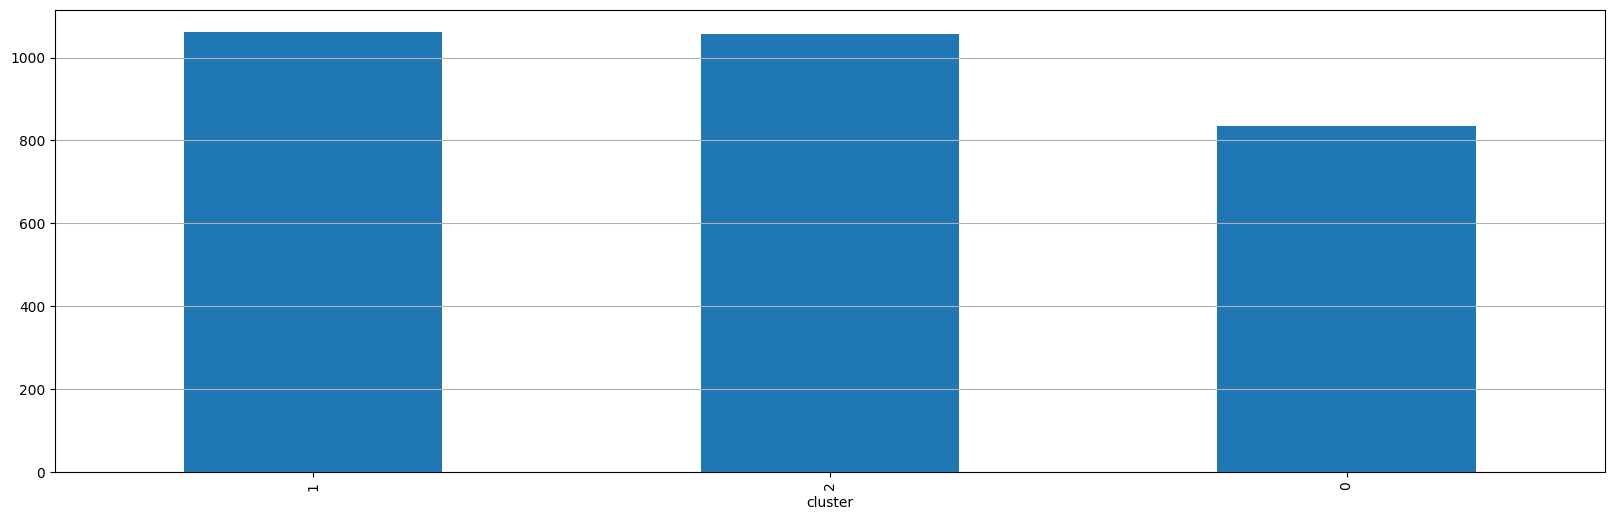

In [116]:
dataframe['cluster'].value_counts().plot(kind='bar', figsize=(20, 6))
ax = plt.grid(axis='y')

In [117]:
grouped_df = dataframe.groupby(['Category', 'cluster'])['title'].count().to_frame().reset_index()
grouped_df.columns = ['Category', 'Custer', 'News']

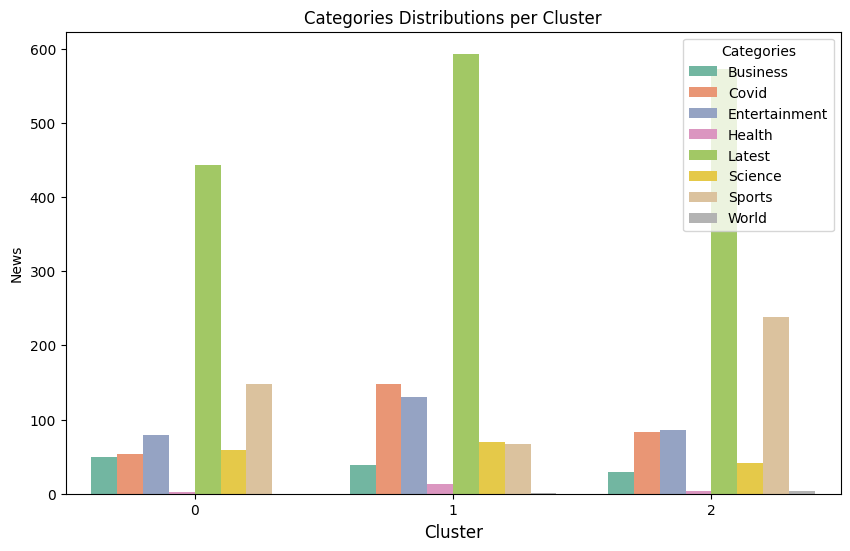

In [118]:
plt.figure(figsize=(10, 6))
sea.barplot(data=grouped_df, x='Custer', y='News', hue='Category', palette='Set2')
plt.title('Categories Distributions per Cluster')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('News')
plt.legend(title='Categories')
plt.show()

### Main texts in clusters

In [119]:
import tqdm
from collections import Counter

def most_common_word(text, max_words=10):
    counter = Counter(text.split(' '))
    counter = list(counter.keys())[0:max_words]
    counter= [c for c in counter if len(c) > 1]
    return counter   


def plot_word_cloud(df, text_column):
    cluster_text = df[text_column].values
    cluster_text = " ".join(cluster_text)
    cluster_text = [word for word in cluster_text.split(' ') if len(word) > 1]    
    cluster_text = " ".join(cluster_text)
    cluster_text = Counter(cluster_text.split(' '))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(cluster_text)
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()


Cluster =  0


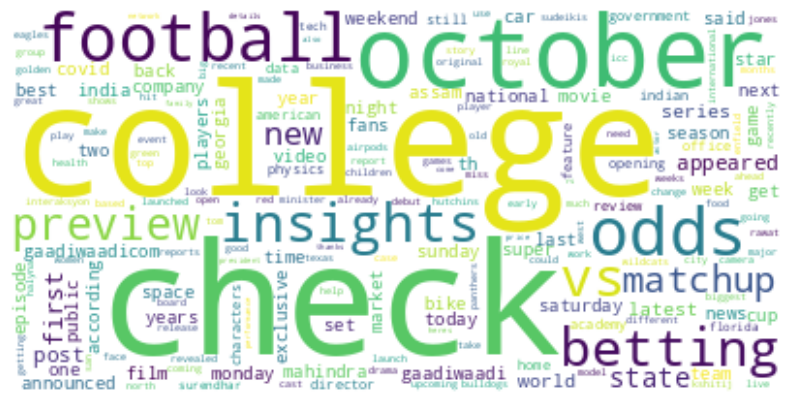

Cluster =  1


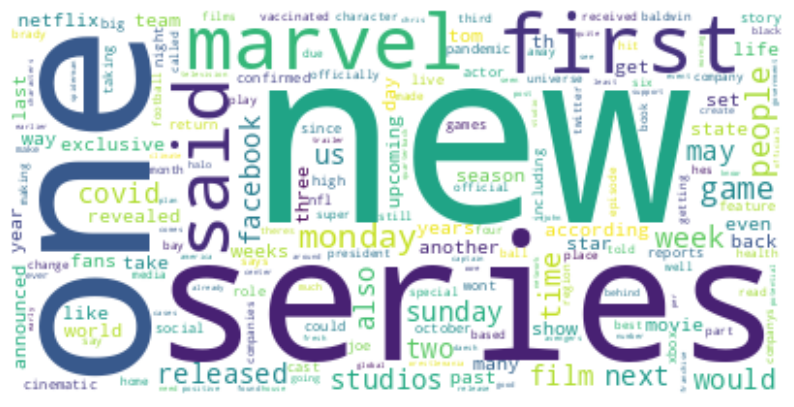

Cluster =  2


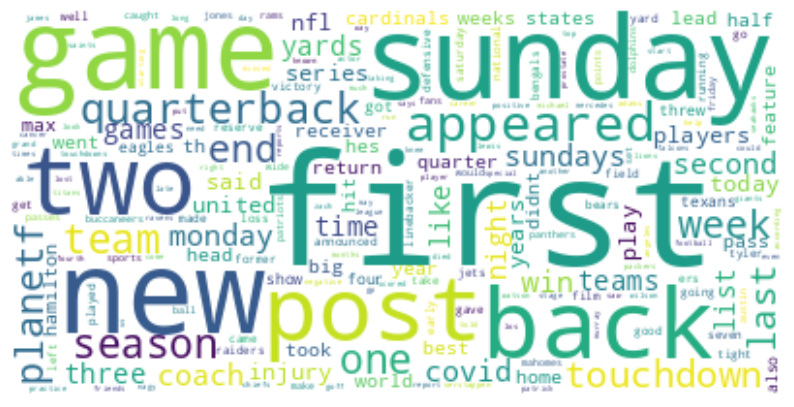

In [120]:
for cluster in np.unique(labels):
    print('Cluster = ', cluster)
    df_filtered = dataframe[(dataframe['cluster'] == cluster) & (dataframe['silhouette_sample'] > 0)].copy()
    plot_word_cloud(df_filtered, 'cleaned_description')

### Similar texts between clusters

In [122]:
cluster = 0
cluster_df = dataframe[dataframe['cluster'] == cluster].copy()
cluster_df = cluster_df.reset_index(drop=True)

cluster_df[['title', 'Category']].head(10)

title  \
0                                                   No quarantine for fully vaccinated players at Australian Open   
1                                                         No more lockdowns in Assam, says CM Himanta Biswa Sarma   
2                                                                      Dispur to review firecrackers' ban by PCBA   
3                                                                        New Covid variant AY.4 detected in India   
4                                                                           'Green Crackers' must be made popular   
5                                                           Fantasy Impact: Davante Adams Placed on COVID-19 List   
6                             Packers Place Davante Adams on the COVID-19 List While Team in Heightened Protocols   
7                                                       Dune Opening Weekend Box Office Revised Up To $41 Million   
8                                           To Keep Americans Healthy, The Administration Must Regain Credibility   
9  Wrestler Jimmy Rave has both legs amputated aged 38 and shares $103k medical bill just months after losing arm   

  Category  
0    Covid  
1    Covid  
2    Covid  
3    Covid  
4    Covid  
5    Covid  
6    Covid  
7    Covid  
8    Covid  
9    Covid

In [123]:
idx_1 = 20
idx_2 = 12

desc_1 = cluster_df.loc[idx_1, 'cleaned_description']
desc_2 = cluster_df.loc[idx_2, 'cleaned_description']

print(desc_1[0:1000])
print('\n')
print(desc_2[0:1000])

ratio = lev.ratio(desc_1, desc_2)
print('\n')
print("Similaridade leveinstein entre as descrições =  ", np.around(ratio, 3))
print('\n')

jason sudeikis took swipe disney return saturday night live last night companys legal battle scarlett johannsson sudeikis hosted last nights episode saturday night reprised characters time member shows cast including joe biden devil sudeikis


arunachal pradesh deputy chief minister chowna mein sought teamwork collection data noble job identifying unsung heroes state


Similaridade leveinstein entre as descrições =   0.366


